In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm 

In [5]:

df=pd.read_json('AOC_recent_tweets.txt')
#try json if it doesnt work 
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2021-02-06 20:22:38+00:00,1358149122264563712,1358149122264563712,RT @RepEscobar: Our country has the moral obli...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-06 20:16:39+00:00,1358147616400408576,1358147616400408576,RT @RoKhanna: What happens when we guarantee $...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-06 20:07:35+00:00,1358145332316667909,1358145332316667904,(Source: https://t.co/3o5JEr6zpd),False,"[0, 33]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.358145e+18,1.358145e+18,...,1026,False,False,en,0.0,NaN,NaN,NaN,NaN,NaN
3,2021-02-06 20:07:07+00:00,1358145218407759875,1358145218407759872,Joe Cunningham pledged to never take corporate...,False,"[0, 156]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.358144e+18,1.358144e+18,...,2880,False,False,en,0.0,"{'media': [{'id': 1358145216155426825, 'id_str...",NaN,NaN,NaN,NaN
4,2021-02-06 20:03:06+00:00,1358144207333036040,1358144207333036032,What’s even more gross is that Mace takes corp...,False,"[0, 197]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7765,False,False,en,0.0,NaN,1.358113e+18,1.358113e+18,"{'url': 'https://t.co/CcVxgDF6id', 'expanded':...",{'created_at': 'Sat Feb 06 18:00:02 +0000 2021...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,2019-10-09 14:14:19+00:00,1181935928249606146,1181935928249606144,Autocrats: “Jump!”\nTrump: “How high?”\n\n- Tr...,False,"[0, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,75938,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3243,2019-10-09 14:00:54+00:00,1181932554552827905,1181932554552827904,RT @HeidiNBC: NEW: Donald Trump's decision to ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3244,2019-10-09 14:00:32+00:00,1181932460516478976,1181932460516478976,Trump decision isn’t about drawing down US mil...,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,32256,False,False,en,0.0,NaN,1.181923e+18,1.181923e+18,"{'url': 'https://t.co/ODpoyZI83r', 'expanded':...",{'created_at': 'Wed Oct 09 13:22:07 +0000 2019...
3245,2019-10-09 13:41:17+00:00,1181927615340453899,1181927615340453888,Federal govs are failing to act on the climate...,False,"[0, 283]","{'hashtags': [{'text': 'GreenNewDeal', 'indice...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7733,False,False,en,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(3247, 31)

In [8]:
from datetime import date 
dt=pd.to_datetime(df['created_at'])
dt
#same link used https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

0      2021-02-06 20:22:38+00:00
1      2021-02-06 20:16:39+00:00
2      2021-02-06 20:07:35+00:00
3      2021-02-06 20:07:07+00:00
4      2021-02-06 20:03:06+00:00
                  ...           
3242   2019-10-09 14:14:19+00:00
3243   2019-10-09 14:00:54+00:00
3244   2019-10-09 14:00:32+00:00
3245   2019-10-09 13:41:17+00:00
3246   2019-10-09 05:32:34+00:00
Name: created_at, Length: 3247, dtype: datetime64[ns, UTC]

In [7]:
df['created_at']=pd.to_datetime(df['created_at'], format= '%Y-%M-%d %H-%M-%S%f-%z')

# converting to datetime using pandas function link that I used https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 

In [6]:
df['created_at']

0      2021-02-06 20:22:38+00:00
1      2021-02-06 20:16:39+00:00
2      2021-02-06 20:07:35+00:00
3      2021-02-06 20:07:07+00:00
4      2021-02-06 20:03:06+00:00
                  ...           
3242   2019-10-09 14:14:19+00:00
3243   2019-10-09 14:00:54+00:00
3244   2019-10-09 14:00:32+00:00
3245   2019-10-09 13:41:17+00:00
3246   2019-10-09 05:32:34+00:00
Name: created_at, Length: 3247, dtype: datetime64[ns, UTC]

In [10]:
import datetime as date

def time_in_hours(): 
    time_in_hours = (dt.hour+ dt.minute/60+ dt.second/(60**2))
print (time_in_hours)

# I was really stuck on this that I was unable to get it to print correctly but the code did not have any errors 
#This is what I used for inspiration https://stackoverflow.com/questions/48992794/datetime-to-decimal-hour-and-minutes-in-python3

<function time_in_hours at 0x16acb0d60>


In [9]:
def time_in_hours(): 
    return 
df['hours']=df['created_at'].apply(time_in_hours)
#this was my attempt at trying to figure out how to create a new column; error said I needed to positional arguments, but I couldn't figure out what it wanted 

TypeError: time_in_hours() takes 0 positional arguments but 1 was given

In [11]:
from datetime import date

today= date.today()
print('today is', today)
print('day', today.day)
print('month',today.month)
print('year',today.year)

# this is just me exploring how datetime works in hopes that I could get it 
# I could not, but the video that I used was https://www.youtube.com/watch?v=-AlFiS74aQg

today is 2024-04-24
day 24
month 4
year 2024


In [18]:
file1= df.loc[0:3247,'created_at':'full_text']


file1.to_csv('Hw7.csv', mode='a', index= False, header= False)
#I was not able to create the header, I really tried I am sorry, but I think that I got the columns into 
#the designated csv file, I used the following website as inspiration https://www.geeksforgeeks.org/how-to-append-pandas-dataframe-to-existing-csv-file/

In [19]:
file1

,created_at,id,id_str,full_text
0,2021-02-06 20:22:38+00:00,1358149122264563712,1358149122264563712,RT @RepEscobar: Our country has the moral obli...
1,2021-02-06 20:16:39+00:00,1358147616400408576,1358147616400408576,RT @RoKhanna: What happens when we guarantee $...
2,2021-02-06 20:07:35+00:00,1358145332316667909,1358145332316667904,(Source: https://t.co/3o5JEr6zpd)
3,2021-02-06 20:07:07+00:00,1358145218407759875,1358145218407759872,Joe Cunningham pledged to never take corporate...
4,2021-02-06 20:03:06+00:00,1358144207333036040,1358144207333036032,What’s even more gross is that Mace takes corp...
...,...,...,...,...
3242,2019-10-09 14:14:19+00:00,1181935928249606146,1181935928249606144,Autocrats: “Jump!”\nTrump: “How high?”\n\n- Tr...
3243,2019-10-09 14:00:54+00:00,1181932554552827905,1181932554552827904,RT @HeidiNBC: NEW: Donald Trump's decision to ...
3244,2019-10-09 14:00:32+00:00,1181932460516478976,1181932460516478976,Trump decision isn’t about drawing down US mil...
3245,2019-10-09 13:41:17+00:00,1181927615340453899,1181927615340453888,Federal govs are failing to act on the climate...


In [43]:
planets= sns.load_dataset('planets')

In [65]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


/Users/faithblea/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


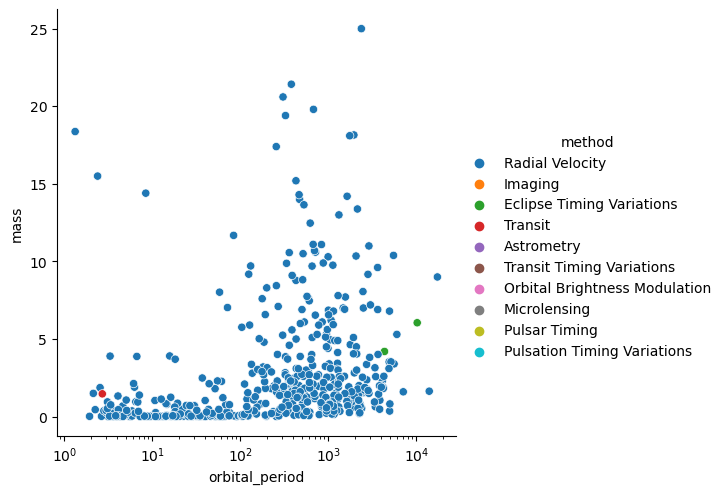

In [75]:
import matplotlib.pyplot as plt 
# importing matplot lib to call 

pg= sns.relplot(data=planets, x='orbital_period', y='mass', hue='method')
#used Pandas and Seaborn to create a plot that acconted for three different variables
#took inspiration from stack over flow and pandas website links are here https://seaborn.pydata.org/generated/seaborn.relplot.html 
# https://stackoverflow.com/questions/14885895/color-a-scatter-plot-by-column-values

plt.xscale('log')
#adjusted log scale here 

plt.show()

In [56]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


/Users/faithblea/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


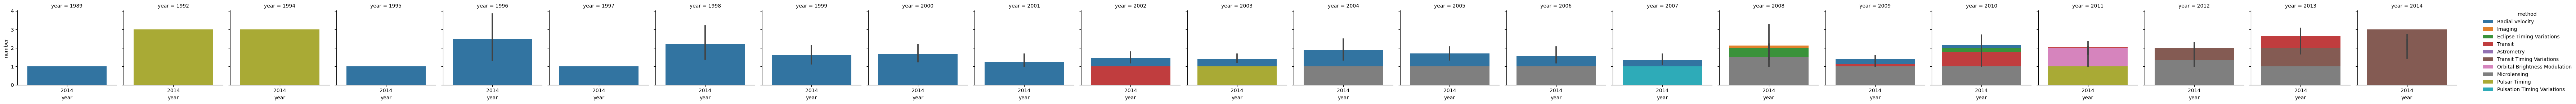

In [175]:


g=sns.FacetGrid(planets,col='year',hue= 'method')
#Seaborn code to run the stacked grid this is the link that I used for inspiration https://seaborn.pydata.org/generated/seaborn.FacetGrid.htmlhttps://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g.map_dataframe(sns.barplot, x='year', y='number')
#I really tried to keep it all in one graph but I could mot figure out how to graph the columns in one 
#Everytime I tried it would only graph the year 2007
g.add_legend()
#adding the legend! 


In [91]:
df1=planets.loc[:,'method']
df1
#this was me just checking what the various differnt methods are 

0       Radial Velocity
1       Radial Velocity
2       Radial Velocity
3       Radial Velocity
4       Radial Velocity
             ...       
1030            Transit
1031            Transit
1032            Transit
1033            Transit
1034            Transit
Name: method, Length: 1035, dtype: object